# K-Means Clustering - Make Blobs 

In [40]:
import pandas as pd
from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go


import os


In [49]:
# General config of pandas
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
#pd.set_option("display.width", None)
#pd.set_option('display.expand_frame_repr', False)


In [4]:
X, y = make_blobs(n_samples=30, 
                  centers=3, 
                  n_features=2,
                  random_state=42)
X , y

(array([[-2.97867201,  9.55684617],
        [ 3.16135685,  1.25332548],
        [ 3.48888526,  2.3488677 ],
        [ 4.03817222,  3.82544787],
        [-1.04354885,  8.78850983],
        [-3.52202874,  9.32853346],
        [ 5.37834542,  2.14453797],
        [-7.34026596, -5.82298737],
        [-2.26723535,  7.10100588],
        [-6.5360089 , -8.64314975],
        [ 4.52423055,  1.67206599],
        [-6.55554322, -7.26519187],
        [ 4.03924015,  1.68147593],
        [ 4.84874243,  0.01349956],
        [-3.05358035,  9.12520872],
        [ 3.31169279,  2.17003092],
        [-5.84862767, -5.94882947],
        [-2.44166942,  7.58953794],
        [-3.4172217 ,  7.60198243],
        [-7.55654919, -6.2684333 ],
        [-7.71884471, -7.18932197],
        [-7.35880143, -7.06576857],
        [-6.06710137, -5.52386956],
        [ 4.62638161,  0.91545875],
        [ 5.46242375,  0.75232603],
        [-4.23411546,  8.4519986 ],
        [-7.98596217, -8.07631622],
        [-0.92998481,  9.781

In [13]:
# Creating a DataFrame with the arrays generated by make_blobs function
df = pd.DataFrame(data=X, columns=["Feature1", "Feature2"])

# Adding the cluters column
df["Cluster"] = y

df.head()

,Feature1,Feature2,Cluster
0,-2.978672,9.556846,0
1,3.161357,1.253325,1
2,3.488885,2.348868,1
3,4.038172,3.825448,1
4,-1.043549,8.788510,0


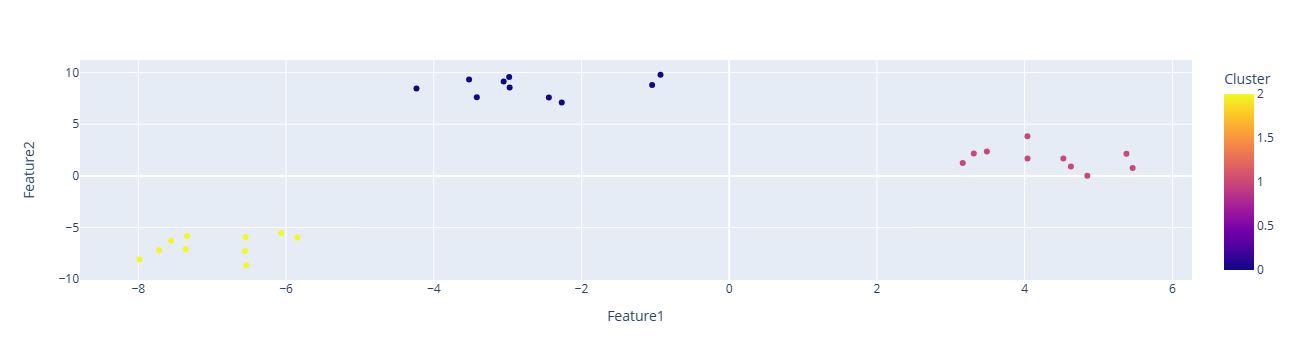

In [50]:
fig = px.scatter(df, x="Feature1", y="Feature2", color="Cluster")
fig.show()

### Training Phase K-Means

In [32]:
# Instantiating the model with some hyperparameters
kmeans = KMeans(n_clusters=3, n_init=15, random_state=42)

# Fitting the model with the two features
kmeans.fit(df[["Feature1","Feature2"]])

C:\Users\LENOVO\anaconda3\envs\ds-lasalle\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=3, n_init=15, random_state=42)

In [36]:
# Retrieving the info of the centroids
centroids = kmeans.cluster_centers_
print(f"Centroids: {centroids}")

PredictedClusters= kmeans.labels_
print(f"\nPredicted Clusters: {PredictedClusters}")


Centroids: [[-6.95160684 -6.77084326]
 [ 4.2879471   1.67770362]
 [-2.6860672   8.58739003]]

Predicted Clusters: [2 1 1 1 2 2 1 0 2 0 1 0 1 1 2 1 0 2 2 0 0 0 0 1 1 2 0 2 2 0]


### Performance Visualization

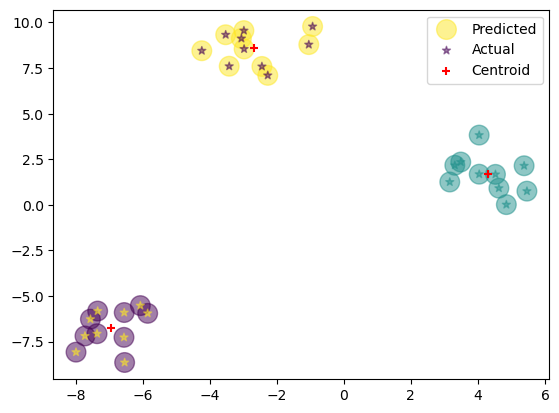

In [39]:
# first plot version with matplotlib

plt.scatter(df["Feature1"],df["Feature2"],c=PredictedClusters, marker="o", s=200, alpha=0.5, label="Predicted")
plt.scatter(df["Feature1"],df["Feature2"],c=y, marker="*", alpha=0.5, label="Actual")
plt.scatter(centroids[:,0],centroids[:,1],c="red", marker="+", label="Centroid")
plt.legend()
plt.show()

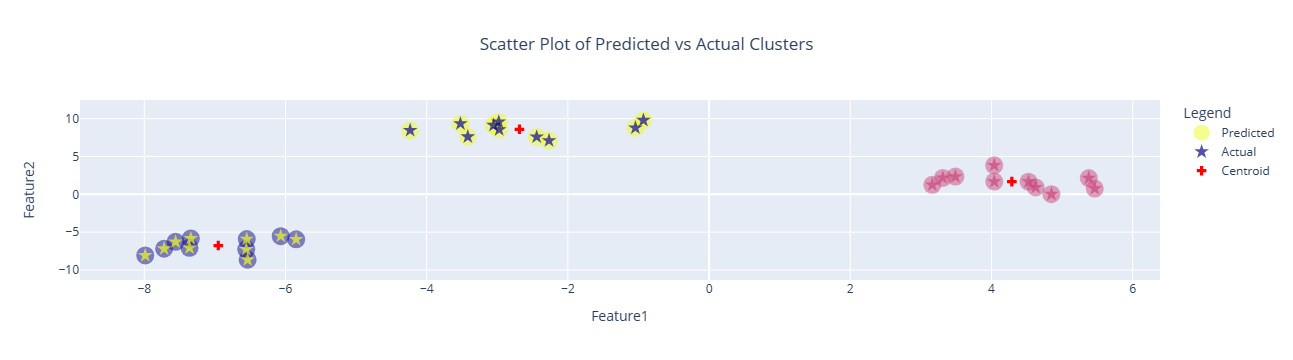

In [54]:
# Second plot version with plotly

trace_actual = go.Scatter(
    x=df['Feature1'], y=df['Feature2'],
    mode='markers',
    marker=dict(color=df["Cluster"], size=11, opacity=0.7, symbol='star'),
    name='Actual'
)

trace_predicted = go.Scatter(
    x=df['Feature1'], y=df['Feature2'],
    mode='markers',
    marker=dict(color=PredictedClusters, size=18, opacity=0.5, symbol='circle'),
    name='Predicted'
)


trace_centroids = go.Scatter(
    x=centroids[:, 0], y=centroids[:, 1],
    mode='markers',
    marker=dict(color='red', size=8, symbol='cross'),
    name='Centroid'
)

# Create the figure
fig = go.Figure(data=[trace_predicted, trace_actual, trace_centroids])

# Update layout
fig.update_layout(
    title='Scatter Plot of Predicted vs Actual Clusters',
    xaxis_title='Feature1',
    yaxis_title='Feature2',
    legend_title='Legend',
    title_x=0.5
)

# Show the figure
fig.show()